# Probability and Statistics Review

Based on "Machine Learning: A Probabilistic Perspective" by Kevin P. Murphy (Chapter 2).

# What is probability?
 
* At least two different interpretations:
    * **Frequentist**: probabilities are long-run frequencies of events
    * **Bayesian**: probabilities are used to quantify our **uncertainty**

One advantage of the Bayesian interpretation is that it can be used to model events that do not have long-term frequencies. 


# A brief review of probability theory

## Discrete random variables

$p(A)$ denotes the probability that the event $A$ is true

* $0 \leq p(A) \leq 1$

We write $p(\bar{A})$ to denote the probability of the event not $A$

* $p(\bar{A}) = 1 - p(A)$

We can extend the notion of binary events by defining a **discrete random variable** $X$ which can take on any value from a finite or countably infinite set $\mathcal{X}$. We denote the probability of the event that $X = x$ by $p(X = x)$ or just $p(x)$ for short.

* $0 \leq p(x) \leq 1$
* $\sum_{x \in \mathcal{X}} p(x) = 1$

Let's look at some discrete distributions:

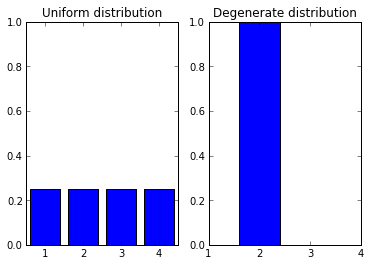

In [1]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2)

ax[0].bar([1, 2, 3, 4],[0.25, 0.25, 0.25, 0.25], align='center')
ax[0].set_ylim([0, 1])
_ = ax[0].set_xticks([1, 2, 3, 4])
ax[0].set_title('Uniform distribution')

ax[1].bar([1, 2, 3, 4],[0, 1.0, 0, 0], align='center')
ax[1].set_ylim([0, 1])
_ = ax[1].set_xticks([1, 2, 3, 4])
ax[1].set_title('Degenerate distribution')


## Fundamental rules

### Probability of a union of two events

Given two events, $A$ and $B$, we define the probability of $A$ or $B$ as

$$
\begin{align}
p(A \lor B) &= p(A) + p(B) - p(A \land B) \\
&= p(A) + p(B) & \text{if $A$ and $B$ are mutually exclusive}
\end{align}
$$

### Joint probabilities

We define the probability of the joint event $A$ and $B$ as 

$$
p(A,B) = p(A \land B) = p(A|B)p(B)
$$

Given a **joint distribution** on two events p(A,B), we define the **marginal distribution** as

$$
p(A) = \sum_b p(A,B) = \sum_b p(A|B=b)p(B=b)
$$

### Conditional probability

We define the **conditional probability** of event $A$, given that event $B$ is true, as

$$
\begin{align}
p(A|B) &= \frac{p(A,B)}{p(B)} & \text{if $p(B) > 0$}
\end{align}
$$

## Bayes' rule

Manipulating the basic definition of conditional probability gives us one of the most important formulas in probability theory

$$p(X=x|Y=y) = \frac{p(X=x,Y=y)}{P(Y=y)} = \frac{p(Y=y|X=x)p(X=x)}{\sum_{x'}p(Y=y|X=x')p(X=x')}$$

## Independence and conditional independence

We say $X$ and $Y$ are **unconditionally independent** or **marginally independent**, denoted $X \perp Y$, if we can represent the joint as the product of the two marginals, i.e.,

$$X \perp Y \Longleftrightarrow p(X,Y) = p(X)p(Y)$$

<img width=400px src="files/pxyGrid.svg">

In general, we say a set of variables is mutually independent if the joint can be written as a product of marginals.

We say $X$ and $Y$ are **conditionally independent** given $Z$ iff the conditional joint can be written as a product of conditional marginals:

$$X \perp Y|Z \Longleftrightarrow p(X,Y|Z)=p(X|Z)p(Y|Z)$$

CI assumptions allow us to build large probabilistic models from small pieces.

## Continuous random variables

Suppose $X$ is some uncertain continuous quantity. The probability that $X$ lies in any interval $a \leq X \leq b$ can be computed as follows. Define the events $A = (X \leq a), B = (X \leq b)$ and $W = (a < X \leq b)$. We have that $B = A \vee W$, and since $A$ and $W$ are mutually exclusive, the sum rule gives

$$p(B) = p(A) + p(W)$$

and hence

$p(W) = p(B) - p(A)$

Define the function $F(q) \triangleq p(X \leq q)$. This is called the **cumulative distribution function** or **cdf** of $X$. This is a monotonically non-decreasing function.

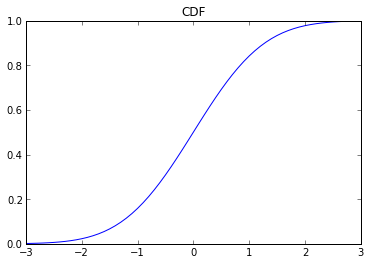

In [2]:
# CDF of Gaussian N(0,1)
import scipy.stats as stats
f = lambda x : stats.norm.cdf(x, 0, 1)
x = np.arange(-3, 3, 0.1)
y = f(x)

plt.plot(x, y, 'b')
plt.title('CDF')


Using the above notation, we have
$$p(a < X \leq b) = F(b) - F(a)$$

Now define $f(x) = \frac{d}{dx} F(x)$ (we assume this derivative exists); this is called a **probability density function** or **pdf**. Given a pdf, we can compute the probability of a continuous variable being in a finite interval as follows:

$$P(a < X \leq b) = \int_a^b f(x) dx$$

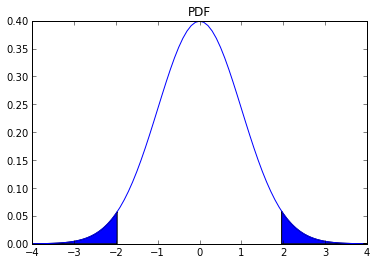

In [3]:
# PDF of Gaussian N(0,1)
# shaded area has 0.05 of the mass
# also written mu +/- 2 \sigma
f = lambda x : stats.norm.pdf(x, 0, 1)
x = np.arange(-4, 4, 0.1)
y = f(x)

plt.plot(x, y, 'b')
l_x = np.arange(-4, -1.96, 0.01)
plt.fill_between(l_x, f(l_x))
u_x = np.arange(1.96, 4, 0.01)
plt.fill_between(u_x, f(u_x))

plt.title('PDF')

We require $p(x) \geq 0$, but it is possible for $p(x)>1$ for any given $x$, so long as the density integrates to 1.

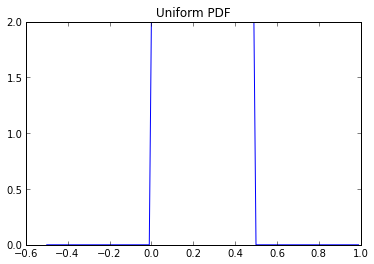

In [5]:
# Example of p(x) > 1, Uniform distribution on (0, 0.5)
f = lambda x: stats.uniform.pdf(x, 0, 0.5)
x = np.arange(-0.5, 1, 0.01)
y = f(x)

plt.plot(x, y, 'b')
plt.title('Uniform PDF')

## Quantiles

If the cdf $F$ is a monotonically increasing function, it has an inverse; let us denote this by $F^{-1}$. If $F$ is the cdf of $X$, then $F^{-1}(\alpha)$ is the value of $x_{\alpha}$ such that $P(X \leq x_a) = \alpha$; this is called the $\alpha$ quantile of $F$.

Note that in the above example, where $\Phi$ is the cdf of the Gaussian distribution $\mathcal{N}(0,1)$, if we set $\alpha=0.05$, the central 95% interval which contains 95% of the probability mass is covered by the range

$$\left(\Phi^{-1}(0.025), \Phi^{-1}(0.975)\right) = (-1.96, 1.96)$$

If the distribution is $\mathcal{N}(\mu, \sigma^2)$, then the 95% interval becomes $(\mu - 1.96\sigma, \mu + 1.96\sigma)$. This is sometimes approximated by writing $\mu \pm 2\sigma$.

## Mean and variance

The most familiar property of a distribution is its **mean**, or **expected value**, denoted by $\mu$. For discrete rv's, it is defined as $\mathbb{E}[X] \triangleq \sum_{x \in \mathcal{X}} x p(x)$, and for continuous rv's, it is defined as $\mathbb{E}[X] \triangleq \int_{\mathcal{X}} x p(x) dx$.

The **variance** is a measure of the "spread" of a distribution, denoted by $\sigma^2$. This is defined as follows:

$$
\begin{align}
\text{var}[X] & \triangleq \mathbb{E}\left[ \left( X - \mu\right)^2 \right] = \int \left( x - \mu \right) ^2 p(x) dx \\\
&= \int x^2 p(x)dx + \mu^2 \int p(x) dx - 2 \mu \int x p(x) dx = \mathbb{E}[X^2] - \mu^2
\end{align}
$$

from which we derive the useful result

$$\mathbb{E}[X^2] = \mu^2 + \sigma^2$$

The **standard deviation** is defined as

$$\text{std}[X] \triangleq \sqrt{\text{var}[X]}$$

# Some common discrete distributions

## The binomial and Bernoulli distributions

Suppose we toss a coin $n$ times. Let $X \in {0, \ldots, n}$ be the number of heads. If the probability of heads is $\theta$, then we say $X$ has a **binomial** distribution, written as $X \sim \text{Bin}(n, \theta)$. The pmf is given by

$$\text{Bin}(k|n,\theta) \triangleq {n\choose k} \theta^k(1 - \theta)^{n-k}$$

where
$$ {n\choose k} \triangleq \frac{n!}{(n-k)!k!}$$

is the number of ways to choose $k$ items from $n$.

This distribution has a mean of $n\theta$ and a variance of $n\theta(1-\theta)$.

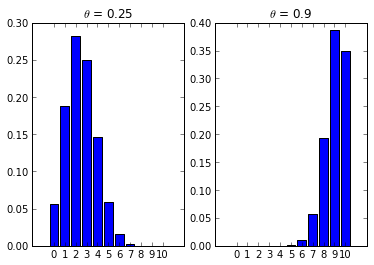

In [6]:
fig, ax = plt.subplots(1, 2)

x = np.arange(11)

f = lambda x : stats.binom.pmf(x, 10, 0.25)

ax[0].bar(x, f(x), align='center')
#ax[0].set_ylim([0, 1])
_ = ax[0].set_xticks(x)
ax[0].set_title(r'$\theta$ = 0.25')

f = lambda x : stats.binom.pmf(x, 10, 0.9)
    
ax[1].bar(x, f(x), align='center')
#ax[1].set_ylim([0, 1])
_ = ax[1].set_xticks(x)
ax[1].set_title(r'$\theta$ = 0.9')

Now suppose we toss a coin only once. Let $X \in {0,1}$ be a binary random variable, with probability of "success" or "heads" of $\theta$. We say that $X$ has a **Bernoulli** distribution. This is written as $X \sim \text{Ber}(\theta)$, where the pmf is defined as

$$\text{Ber}(x|\theta) = \theta^{\mathbb{I}(x=1)}(1-\theta)^{\mathbb{I}(x=0)}$$

In other words,

$$ \text{Ber}(x|\theta) = \left\{ 
\begin{array}{rl}
 \theta &\mbox{ if $x=1$} \\
  1 - \theta &\mbox{ if $x=0$}
\end{array}
\right. $$

This is obviously just a special case of a Binomial distribution with $n=1$.

### The multinomial and multinoulli distribution

To model the outcomes of tossing a $K$-sided die, we can use the **multinomial** distribution. This is defined as follows: let $\mathbf{x}=(x_1, \ldots, x_K)$ be a random vector, where $x_j$ is the number of times side $j$ of the die occurs. Then $\mathbf{x}$ has the following pmf:

$$\text{Mu}(\mathbf{x}|n, \mathbf{\theta}) \triangleq {n \choose x_1,\ldots,x_K} \prod_{j=1}^K \theta_j^{x_j}$$

where $\theta_j$ is the probability that side $j$ shows up, and

$${n \choose x_1,\ldots,x_K} \triangleq \frac{n!}{x_1!x_2! \ldots x_K!}$$

is the **multinomial coefficient** (the number of ways to divide a set of size $n=\sum_{k=1}^K x_k$ into subsets with sizes $x_1$ up to $x_K$).

Now suppose $n=1$. This is like rolling a $K$-sided dice once, so $\mathbf{x}$ will be a vector of 0s and 1s (a bit vector), in which only one bit can be turned on. Specifically, if the dice shows up as face $k$, then the $k$'th bit will be on. In this case, we can think of $x$ as being a scalar categorical random variable with $K$ states (values), and $\mathbf{x}$ is its **dummy encoding**, that is, $\mathbf{x} = \left[\mathbb{I}(x=1),\ldots,\mathbb{I}(x=K)\right]$. For example, if $K=3$, we encode the states 1, 2, and 3 as $(1, 0, 0), (0, 1, 0)$ and $(0, 0, 1)$. This is also called **one-hot encoding**. In this case, the pmf becomes

$$\text{Mu}(\mathbf{x}|1, \mathbf{\theta}) = \prod_{j=1}^K \theta_j^{\mathbb{I}(x_j=1)}$$

This very common special case is known as a **categorical** or **discrete** distribution (Kevin Murphy's text adopts the term **multinoulli distribution** by analogy with the binomial/Bernoulli distinction). We will use the following notation

$$\text{Cat}(x|\mathbf{\theta}) \triangleq \text{Mu}(\mathbf{x}|1, \mathbf{\theta})$$

# Some common continuous distributions

## Gaussian (normal) distribution

The most widely used distribution in statistics and machine learning is the Gaussian or normal distribution. Its pdf is given by

$$\mathcal{N}(x|\mu, \sigma^2) \triangleq \frac{1}{\sqrt{2 \pi \sigma^2}} e^{-\frac{1}{2\sigma^2}(x - \mu)^2}$$

where $\mu = \mathbb{E}[X]$ is the mean (and mode), and $\sigma^2 = \text{var}[X]$ is the variance. $\frac{1}{\sqrt{2 \pi \sigma^2}}$ is the normalization constant needed to ensure the density integrates to 1.

We write $X \sim \mathcal{N}(\mu, \sigma^2)$ to denote that $p(X=x) = \mathcal{N}(x|\mu, \sigma^2)$. If $X \sim \mathcal{N}(0,1)$, we say $X$ follows a **standard normal** distribution. 

We will sometimes talk about the **precision** of a Gaussian, by which we mean the inverse variance: $\lambda = 1/\sigma^2$.

The Gaussian distribution is the most widely used distribution in statistics. Why?

* It has two parameters that are easy to interpret
* The central limit theorem tells us that sums of independent random variables have an approximately Gaussian distribution, making it a good fit for modeling residual errors or "noise"
* The Gaussian distribution makes the least number of assumptions (i.e. has maximum entropy) which makes it a good default choice in many cases
* It has a simple mathematical form, which results in easy to implement, but often highly effective methods

## The Student $t$ distribution

One problem with the Gaussian distribution is that it is sensitive to outliers, since the log-probability only decays quadratically with distance from the centre. A more robust distribution is the **Student** $t$ **distribution**. Its pdf is as follows

$$\mathcal{T}(x|\mu, \sigma^2, \nu) \propto \left[ 1 + \frac{1}{\nu} \left( \frac{x-\mu}{\sigma}\right)^2\right]^{-\left(\frac{\nu + 1}{2}\right)}$$

where $\mu$ is the mean, $\sigma^2>0$ is the scale parameter, and $\nu > 0$ is called the **degrees of freedom**.

The distribution has the following properties:

mean = $\mu$, mode = $\mu$, var = $\frac{\nu \sigma^2}{(\nu - 2)}$

The variance is only defined if $\nu > 2$. The mean is only defined if $\nu > 1$. It is common to use $\nu = 4$, which gives good performance in a range of problems. For $\nu \gg 5$, the Student distribution rapidly approaches a Gaussian distribution and loses its robustness properties.

## The Laplace distribution

Another distribution with heavy tails is the **Laplace distribution**, also known as the **double sided exponential** distribution. This has the following pdf:

$$\text{Lap}(x|\mu,b) \triangleq \frac{1}{2b} \exp \left( - \frac{|x - \mu|}{b}\right)$$

Here $\mu$ is a location parameter and $b>0$ is a scale parameter. This distribution has the following properties:

mean = $\mu$, mode = $\mu$, var = $2b^2$

Not only does it have heavier tails, it puts more probability density at 0 than the Gaussian. This property is a useful way to encourage sparsity in a model, as we will see later.

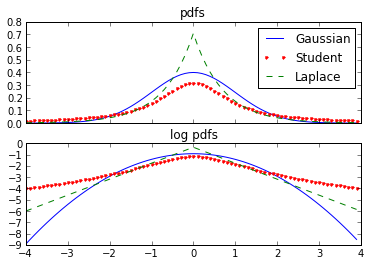

In [7]:
# Show Gaussian, Student, Laplace pdfs and log pdfs
fig, ax = plt.subplots(2, 1, sharex=True)

g = lambda x : stats.norm.pdf(x, 0, 1)
t = lambda x : stats.t.pdf(x, 1, loc=0, scale=1)
l = lambda x : stats.laplace.pdf(x, loc=0, scale=1/np.sqrt(2))

x = np.arange(-4, 4, 0.1)


ax[0].plot(x, g(x), 'b-', label='Gaussian')
ax[0].plot(x, t(x), 'r.', label='Student')
ax[0].plot(x, l(x), 'g--', label='Laplace')

ax[0].legend(loc='best')
ax[0].set_title('pdfs')

ax[1].plot(x, np.log(g(x)), 'b-', label='Gaussian')
ax[1].plot(x, np.log(t(x)), 'r.', label='Student')
ax[1].plot(x, np.log(l(x)), 'g--', label='Laplace')
ax[1].set_title('log pdfs')



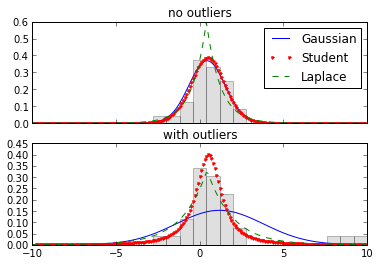

In [8]:
# Demonstrate fitting Gaussian, Student, and Laplace to data
# with and without outliers
n = 30  # n data points
np.random.seed(0)
data = np.random.randn(n)

outliers = np.array([8, 8.75, 9.5])
nn = len(outliers)
nbins = 7

# fit each of the models to the data (no outliers)
model_g = stats.norm.fit(data)
model_t = stats.t.fit(data)
model_l = stats.laplace.fit(data)

fig, ax = plt.subplots(2, 1, sharex=True)

x = np.arange(-10, 10, 0.1)

g = lambda x : stats.norm.pdf(x, model_g[0], model_g[1])
t = lambda x : stats.t.pdf(x, model_t[0], loc=model_t[1], scale=model_t[2])
l = lambda x : stats.laplace.pdf(x, loc=model_l[0], scale=model_l[1])

ax[0].hist(data, bins=25, range=(-10, 10),
           normed=True, alpha=0.25, facecolor='gray')
ax[0].plot(x, g(x), 'b-', label='Gaussian')
ax[0].plot(x, t(x), 'r.', label='Student')
ax[0].plot(x, l(x), 'g--', label='Laplace')

ax[0].legend(loc='best')
ax[0].set_title('no outliers')

# fit each of the models to the data (with outliers)
newdata = np.r_[data, outliers]  # row concatenation
model_g = stats.norm.fit(newdata)
model_t = stats.t.fit(newdata)
model_l = stats.laplace.fit(newdata)


g = lambda x : stats.norm.pdf(x, model_g[0], model_g[1])
t = lambda x : stats.t.pdf(x, model_t[0], loc=model_t[1], scale=model_t[2])
l = lambda x : stats.laplace.pdf(x, loc=model_l[0], scale=model_l[1])

ax[1].hist(newdata, bins=25, range=(-10, 10),
           normed=True, alpha=0.25, facecolor='gray')
ax[1].plot(x, g(x), 'b-', label='Gaussian')
ax[1].plot(x, t(x), 'r.', label='Student')
ax[1].plot(x, l(x), 'g--', label='Laplace')


ax[1].set_title('with outliers')

# Joint probability distributions

A **joint probability distribution** has the form $p(x_1,\ldots,x_D)$ for a set of $D>1$ variables, and models the (stochastic) relationships between the variables. If all the variables are discrete, we can represent the joint distribution as a big multi-dimensional array, with one variable per dimension. However, the number of parameters needed to define such a model is $O(K^D)$, where $K$ is the number of states for each variable.

We can define high dimensional joint distributions using fewer parameters by making conditional independence assumptions. In the case of continuous distributions, an alternative approach is to restrict the form of the pdf to certain functional forms, some of which are examined below.

## Covariance and correlation

The **covariance** between two rv's $X$ and $Y$ measures the degree to which $X$ and $Y$ are (linearly) related. Covariance is defined as

$$\text{cov}[X,Y] \triangleq \mathbb{E}\left[\left(X - \mathbb{E}[X]\right)\left(Y - \mathbb{E}[Y]\right)\right]=\mathbb{E}[XY] - \mathbb{E}[X]\mathbb{E}[Y]$$

If $\mathbf{x}$ is a $d$-dimensional random vector, its **covariance matrix** is defined to be the following symmetric, positive semi-definite matrix:

$$
\begin{align}
\text{cov}[\mathbf{x}] & \triangleq \mathbf{E} \left[\left(\mathbf{x} - \mathbb{E}[\mathbf{x}]\right)\left(\mathbf{x} - \mathbb{E}[\mathbf{x}]\right)^T\right]\\
& = \left( \begin{array}{ccc}
  \text{var}[X_1] & \text{cov}[X_1, X_2] &  \ldots & \text{cov}[X_1, X_d] \\
  \text{cov}[X_2, X_1] & \text{var}[X_2] &  \ldots & \text{cov}[X_2, X_d] \\
  \vdots               & \vdots          & \ddots  & \vdots\\
  \text{cov}[X_d, X_1] & \text{cov}[X_d, X_2] &  \ldots & \text{var}[X_d] 
  \end{array} \right)
\end{align}
$$

Covariances can be between $-\infty$ and $\infty$. Sometimes it is more convenient to work with a normalized measure, with finite bounds. The (Pearson) **correlation coefficient** between $X$ and $Y$ is defined as

$$\text{corr}[X,Y] \triangleq \frac{\text{cov}[X,Y]}{\sqrt{\text{var}[X]\text{var}[Y]}}$$

A **correlation matrix** has the form

$$
\mathbf{R} = \left( \begin{array}{ccc}
  \text{corr}[X_1, X_1] & \text{corr}[X_1, X_2] &  \ldots & \text{corr}[X_1, X_d] \\
  \text{corr}[X_2, X_1] & \text{corr}[X_2, X_2] &  \ldots & \text{corr}[X_2, X_d] \\
  \vdots               & \vdots          & \ddots  & \vdots\\
  \text{corr}[X_d, X_1] & \text{corr}[X_d, X_2] &  \ldots & \text{corr}[X_d, X_d] 
  \end{array} \right)
$$

One can show that $-1 \leq \text{corr}[X,Y] \leq 1$. Hence, in a correlation matrix, each entry on the diagonal is 1, and the other entries are between -1 and 1. One can also show that $\text{corr}[X,Y]=1$ iff $Y=aX + b$ for some parameters $a$ and $b$, i.e. there is a *linear* relationship between $X$ and $Y$. A good way to think of the correlation coefficient is as a degree of linearity.

If $X$ and $Y$ are independent, meaning $p(X,Y)=p(X)p(Y)$, then $\text{cov}[X,Y]=0$, and hence $\text{corr}[X,Y]=0$ so they are uncorrelated. However, the converse is not true: *uncorrelated does not imply independent*. Some striking examples are shown below.

<image src="http://upload.wikimedia.org/wikipedia/commons/0/02/Correlation_examples.png">

Source: http://upload.wikimedia.org/wikipedia/commons/0/02/Correlation_examples.png

## The multivariate Gaussian

The **multivariate Gaussian** or **multivariate normal (MVN)** is the most widely used joint probability density function for continuous variables. The pdf of the MVN in $D$ dimensions is defined by the following

$$\mathcal{N}(\mathbf{x}|\boldsymbol\mu,\mathbf{\Sigma}) \triangleq \frac{1}{(2 \pi)^{D/2}|\mathbf{\Sigma}|^{1/2}} \exp \left[ - \frac{1}{2} \left(\mathbf{x} - \boldsymbol\mu \right)^T \mathbf{\Sigma}^{-1} \left(\mathbf{x} - \boldsymbol\mu\right)\right]$$

where $\boldsymbol\mu = \mathbb{E}[\mathbf{x}] \in \mathbb{R}^D$ is the mean vector, and $\Sigma = \text{cov}[\mathbf{x}]$ is the $D \times D$ covariance matrix. Sometimes we will work in terms of the **precision matrix** or **concentration matrix** instead. This is just the inverse covariance matrix, $\Lambda = \Sigma^{-1}$. The normalization constant $(2 \pi)^{-D/2}|\Lambda|^{1/2}$ ensures that the pdf integrates to 1.

The figure below plots some MVN densities in 2d for three different kinds of covariance matrices. A full covariance matrix has $D(D+1)/2$ parameters (we divide by 2 since $\Sigma$ is symmetric). A diagonal covariance matrix has $D$ parameters, and has 0s on the off-diagonal terms. A **spherical** or **isotropic** covariance, $\Sigma = \sigma^2 \mathbf{I}_D$, has one free parameter.

/opt/anaconda/lib/python2.7/site-packages/numpy/ma/core.py:2639: ComplexWarning: Casting complex values to real discards the imaginary part
  _data = np.array(data, dtype=dtype, copy=copy, subok=True, ndmin=ndmin)
/opt/anaconda/lib/python2.7/site-packages/numpy/core/numeric.py:320: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/opt/anaconda/lib/python2.7/site-packages/numpy/ma/core.py:2914: ComplexWarning: Casting complex values to real discards the imaginary part
  output = self._data.astype(newtype).view(type(self))


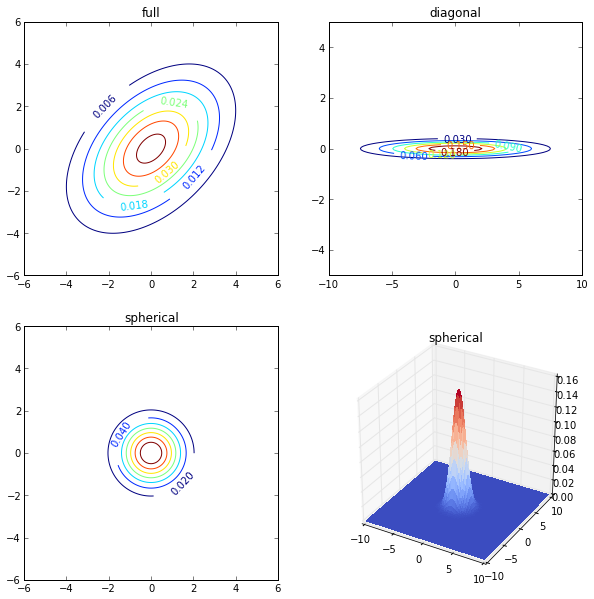

In [9]:
# plot a MVN in 2D and 3D
import matplotlib.mlab as mlab
from scipy.linalg import eig, inv
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

delta = 0.05
x = np.arange(-10.0, 10.0, delta)
y = np.arange(-10.0, 10.0, delta)
X, Y = np.meshgrid(x, y)

S = np.asarray([[2.0, 1.8],
                [1.8, 2.0]])
mu = np.asarray([0, 0])

Z = mlab.bivariate_normal(X, Y, sigmax=S[0, 0], sigmay=S[1, 1], 
                          mux=mu[0], muy=mu[1], sigmaxy=S[0, 1])

#fig, ax = plt.subplots(2, 2, figsize=(10, 10),
#                       subplot_kw={'aspect': 'equal'})

fig = plt.figure(figsize=(10, 10))

ax = fig.add_subplot(2, 2, 1)

CS = ax.contour(X, Y, Z)
plt.clabel(CS, inline=1, fontsize=10)

ax.set_xlim((-6, 6))
ax.set_ylim((-6, 6))
ax.set_title('full')

# Decorrelate
[D, U] = eig(S)

S1 = np.dot(np.dot(U.T, S), U)

Z = mlab.bivariate_normal(X, Y, sigmax=S1[0, 0], sigmay=S1[1, 1], 
                          mux=mu[0], muy=mu[0], sigmaxy=S1[0, 1])

ax = fig.add_subplot(2, 2, 2)
CS = ax.contour(X, Y, Z)
plt.clabel(CS, inline=1, fontsize=10)


ax.set_xlim((-10, 10))
ax.set_ylim((-5, 5))
ax.set_title('diagonal')

# Whiten

A = np.dot(sqrt(linalg.inv(np.diag(D))), U.T)
mu2 = np.dot(A, mu)
S2 = np.dot(np.dot(A, S), A.T)  # may not be numerically equal to I

np.testing.assert_allclose(S2, np.eye(2))  # check

# plot centred on original mu, not shifted mu
Z = mlab.bivariate_normal(X, Y, sigmax=S2[0, 0], sigmay=S2[1, 1], 
                          mux=mu[0], muy=mu[0], sigmaxy=S2[0, 1])

ax = fig.add_subplot(2, 2, 3)
CS = ax.contour(X, Y, Z)
plt.clabel(CS, inline=1, fontsize=10)

ax.set_xlim((-6, 6))
ax.set_ylim((-6, 6))
ax.set_title('spherical')

axx = fig.add_subplot(2, 2, 4, projection='3d')
surf = axx.plot_surface(X, Y, Z, rstride=5, cstride=5, cmap=cm.coolwarm,
                        linewidth=0, antialiased=False)
axx.set_title('spherical')

# Monte Carlo approximation

In general, computing the distribution of a function of a rv can be difficult. One simple but powerful method is as follows. First we generate $S$ samples from the distribution, call them $x_1,\ldots,x_S$. Given the samples, we can approximate the distribution of $f(X)$ by using the empirical distribution of $\left\{ f(x_s)\right\}_{s=1}^S$. This is called a **Monte Carlo** approximation, named after a city in Europe known for its plush gambling casinos.

We can use Monte Carlo to approximate the expected value of any function of a random variable. We simply draw samples, and then compute the arithmetic mean of the function applied to the samples. This can be written as follows:

$$\mathbb{E}[f(X)] = \int f(x) p(x) dx \approx \frac{1}{S} \sum_{s=1}^S f(x_s)$$

where $x_s \sim p(X)$. This is called Monte Carlo integration, and has the advantage over numerical integration (which is based on evaluating the function at a fixed grid of points) that the function is only evaluated in places where there is non-negligible probability.

By varying the function $f(x)$, we can approximate many quantities of interest, such as

* $\bar{x} = \frac{1}{S}\sum_{s=1}^S x_s \rightarrow \mathbb{E}[X]$
* $\frac{1}{S}\sum_{s=1}^S (x_s - \bar{x})^2 \rightarrow \text{var}[X]$
* $\frac{1}{S} \#\left\{ x_s \leq c\right\} \rightarrow P(X \leq c)$
* median$\left\{x_1,\ldots,x_S\right\} \rightarrow$ median$(X)$

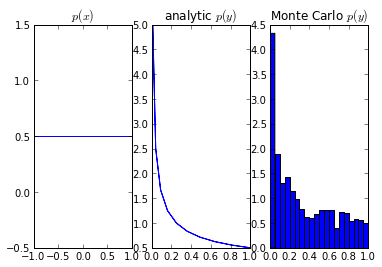

In [10]:
# computing the distribution of y = x^2 using Monte Carlo
fig, ax = plt.subplots(1, 3)

a = -1
b = 1
# avoid 0
xs = np.r_[np.arange(a, 0, 0.1),
           np.arange(0.1, b + 0.1, 0.1)]

# note, uniform on loc, loc + scale
px = stats.uniform.pdf(xs, a, b - a)

ax[0].plot(xs, px, 'b-')
ax[0].set_ylim((-0.5, 1.5))
ax[0].set_title(r'$p(x)$')

f = lambda x: x**2

ys = f(xs)

# Analytic
ppy = 1.0/(2*np.sqrt(ys))

ax[1].plot(ys, ppy, 'b-')
ax[1].set_title(r'analytic $p(y)$')

# Monte Carlo
n = 1000
samples = np.random.rand(n)*(b-a) + a

yss = f(samples)
ax[2].hist(yss, bins=20, normed=True)
ax[2].set_title(r'Monte Carlo $p(y)$')

## Accuracy of Monte Carlo approximation

The accuracy of a MC approximation increases with sample size. This is demonstrated in the figure below. On the top row, we plot a histogram of samples from a Gaussian distribution. On the bottom row, we plot a smoothed version of these samples using something called a kernel density estimate. Note that this smoothed estimate is just used for the purposes of plotting -- it's not part of the MC estimate itself.

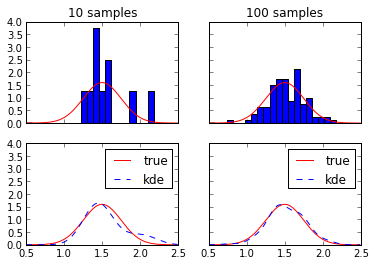

In [12]:
# 10 and 100 samples from a Gaussian distribution
# recovering density through Monte Carlo estimation
fig, ax = plt.subplots(2, 2, sharex=True, sharey=True)

np.random.seed(5)
xs = np.arange(0.5, 2.5, 0.01)
mu = 1.5
sigma = 0.25

n = 10  # number of samples

# scale parameter is standard deviation
f = lambda x : stats.norm.pdf(x, mu, sigma)
ax[0, 0].plot(xs, f(xs), 'r-')
samples = sigma * np.random.randn(n) + mu
ax[0, 0].hist(samples, range=(0.5, 2.5), bins=25, normed=True)
ax[0,0].set_title('%d samples' % n)

model_kde = stats.kde.gaussian_kde(samples)
ax[1, 0].plot(xs, f(xs), 'r-', label='true')
ax[1, 0].plot(xs, model_kde(xs), 'b--', label='kde')
ax[1, 0].legend(loc='best')

n = 100  # number of samples
f = lambda x : stats.norm.pdf(x, mu, sigma)
ax[0, 1].plot(xs, f(xs), 'r-')
samples = sigma * np.random.randn(n) + mu
ax[0, 1].hist(samples, range=(0.5, 2.5), bins=25, normed=True)
ax[0,1].set_title('%d samples' % n)

model_kde = stats.kde.gaussian_kde(samples)
ax[1, 1].plot(xs, f(xs), 'r-', label='true')
ax[1, 1].plot(xs, model_kde(xs), 'b--', label='kde')
ax[1, 1].legend(loc='best')



If we denote the exact mean by $\mu = \mathbb{E}[f(X)]$, and the MC approximation by $\hat{\mu}$, one can show that, with independent samples,

$$(\hat{\mu} - \mu) \rightarrow \mathcal{N}(0, \frac{\sigma^2}{S})$$

where

$$\sigma^2 = \text{var}[f(X)] = \mathbb{E}[f(X)^2] - \mathbb{E}[f(X)]^2$$

This is a consequence of the central limit theorem. Of course, $\sigma^2$ is unknown in the above expression, but it can also be estimated by MC:

$$\hat{\sigma}^2 = \frac{1}{S}\sum_{s=1}^S \left( f(x_s) - \hat{\mu} \right)^2$$

Then we have

$$P \left\{ \mu - 1.96 \frac{\hat{\sigma}}{\sqrt{S}} \leq \hat{\mu} \leq \mu + 1.96 \frac{\hat{\sigma}}{\sqrt{S}}\right\} \approx 0.95$$

The term $\sqrt{\frac{\hat{\sigma}^2}{S}}$ is called the (numerical or empirical) **standard error**, and is an estimate of our uncertainty about our estimate of $\mu$. 

If we want to report an answer which is accurate to within $\pm \epsilon$ with probability at least 95%, we need to use a number of samples $S$ which satisfies $1.96\sqrt{\hat{\sigma}^2/S} \leq \epsilon$. We can approximate the 1.96 factor by 2, yielding $S \geq \frac{4\hat{\sigma}^2}{\epsilon^2}$.

# Information theory

**Information theory** is concerned with representing data in a compact fashion (a task known as **data compression** or **source coding**), as well as with transmitting and storing it in a way that is robust to errors (a task known as **error correction** or **channel coding**). At first, this seems far removed from the concerns of probability theory and machine learning, but in fact there is an intimate connection.

To see this, note that compactly representing data requires allocating short codewords to highly probable bit strings, and reserving longer codewords to less probable bit strings. This is similar to the situation in natural language, where common words (such as "a", "the", "and") are generally much shorter than rare words. Also, decoding messages sent over noisy channels requires having a good probability model of the kinds of messages that people tend to send.

## Entropy

The **entropy** of a random variable $X$ with distribution $p$, denoted by $\mathbb{H}(X)$ or sometimes $\mathbb{H}(p)$, is a measure of its uncertainty. In particular, for a discrete variable with $K$ states, it is defined by

$$\mathbb{H}(X) \triangleq -\sum_{k=1}^K p(X=k) \log_2 p(X = k)$$

Usually we use log base 2, in which case the units are called **bits** (short for binary digits). If we use log base $e$, the units are called **nats**. 

The discrete distribution with maximum entropy is the uniform distribution. Hence for a $K$-aray random variable, the entropy is maximized if $p(x=k)=1/K$; in this case, $\mathbb{H}(X)=\log_2 K$. Conversely, the distribution with minimum entropy (which is zero) is any delta-function that puts all of its mass on one state. Such a distribution has no uncertainty.

For the special case of binary random variables, $X \in \left\{0,1 \right\}$, we can write $p(X=1) = \theta$ and $p(X=0) = 1-\theta$. Hence the entropy becomes

$$
\begin{array}
\mathbb{H}(X) & = - \left[ p(X=1) \log_2 p(X=1) + p(X=0) \log_2 p(X=0) \right]\\
              & = - \left[ \theta \log_2 \theta + (1-\theta) \log_2 (1-\theta) \right]
\end{array}
$$

This is called the **binary entropy function** and is plotted below.

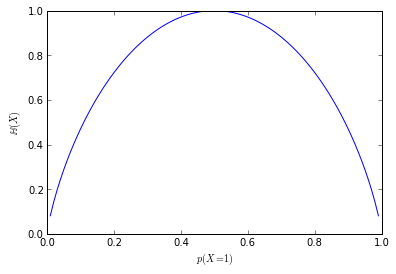

In [47]:
# Plot the entropy of a Bernoulli random variable
# as a function of \theta
t = np.arange(0.01, 1, 0.01)
h = lambda t: - (t * log2(t) + ( 1 - t ) * log2(1 - t))

plt.plot(t, h(t), 'b-')
plt.ylabel(r'$\mathbb{H}(X)$')
plt.xlabel(r'$p(X = 1)$')

## KL divergence

One way to measure the dissimilarity of two probability distributions, $p$ and $q$, is known as the **Kullback-Leibler divergence (KL divergence)** or **relative entropy**. This is defined as follows

$$\mathbb{KL}(p||q) \triangleq \sum_{k=1}^K p_k \log \frac{p_k}{q_k}$$

where the sum gets replaced by an integral for pdfs. We can rewrite this as

$$\mathbb{KL}(p||q) = \sum_k p_k \log p_k - \sum_k p_k \log q_k = -\mathbb{H}(p) + \mathbb{H}(p,q)$$

where $\mathbb{H}(p,q)$ is called the **cross entropy**,

$$\mathbb{H}(p,q) \triangleq -\sum_k p_k \log q_k$$

One can show that the cross entropy is the average number of bits needed to encode data coming from a source with distribution $p$ when we use model $q$ to define our codebook. Hence, the "regular" entropy $\mathbb{H}(p) = \mathbb{H}(p,p)$, is the expected number of bits if we use the true model, so the KL divergence is the difference between these. In other words, the KL divergence is the average number of *extra* bits needed to encode the data, due to the fact that we used distribution $q$ to encode the data instead of the true distribution $p$.

An important fact is that $\mathbb{KL}(p||q) \geq 0$ with equality iff $p=q$.

## Mutual information

Consider two random variables, $X$ and $Y$. Suppose we want to know how much knowing one variable tells us about the other. We could compute the correlation coefficient, but this is only defined for real-valued random variables, and furthermore, this is a very limited measure of dependence, as we saw earlier. A more general approach is to determine how similar the joint distribution $p(X,Y)$ is to the factored distribution $p(X)p(Y)$. This is called the **mutual information** or **MI**, and is defined as follows:

$$\mathbb{I}(X;Y) \triangleq \mathbb{KL}\left(p(X,Y))||p(X)p(Y)\right)=\sum_x \sum_y p(x,y) \log \frac{p(x,y)}{p(x)p(y)}$$

To gain insight into the meaning of MI, it helps to re-express it in terms of joint and conditional entropies. One can show that the above expression is equivalent to the following:

$$\mathbb{I}(X;Y) = \mathbb{H}(X) - \mathbb{H}(X|Y) = \mathbb{H}(Y) - \mathbb{H}(Y|X)$$

where $\mathbb{H}(Y|X)$ is the **conditional entropy**, defined as $\mathbb{H}(Y|X) = \sum_x p(x) \mathbb{H}(Y|X=x)$. Thus we can interpret the MI between $X$ and $Y$ as the reduction in uncertainty about $X$ after observing $Y$, or, by symmetry, the reduction in uncertainty about $Y$ after observing $X$.